                                  Показатель      Значение
0                 Среднегодовой темп роста J      1.054610
1                Экстраполяция q_extr (тыс.)   2051.921302
2         Стратегический таргет q_str (тыс.)   4252.342500
3        Стратегический разрыв Δq_str (тыс.)   2200.421198
4                                Δq_C (тыс.)    911.295000
5                                Δq_M (тыс.)   1265.670000
6                              Δq_int (тыс.)   2176.965000
7                               Δq_vv (тыс.)     23.456198
8        Необходимые новые каналы M_vv (шт.)      1.181672
9   Общая устанавливаемая мощность P_M (шт.)      2.272447
10                        Требуемые КВ (ед.)   2863.283178
11                        Доступные КВ (ед.)  36250.000000
12      Фактический Δq_vv (тыс.) при бюджете     23.456198
13                  Фактический q_end (тыс.)   4252.342500
14                           U_voz (мтр/чел)     30.450000
15              Доля достижимого U/U_str (%)    100.0000

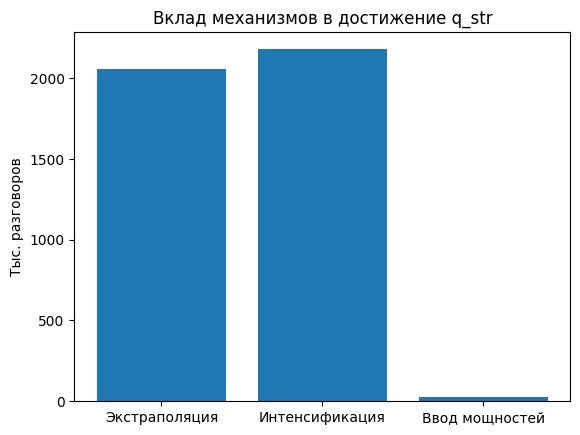

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Input data
q = [1271.55, 1362.9, 1409.1, 1475.25, 1572.9]  # data for preceding 5 years (thousands)
M_mon = 420
M_z = 346.5
C_f = 17.22  # thousand mtr/channel
C_n = 19.85  # thousand mtr/channel
d_ex = 1.0
U_str = 30.45  # mtr per person
N_pl = 139.65 * 1000  # persons
K_vud = 1260  # capex units per channel
K_v_fact = 36250  # available capex units
U_osv = 0.52

# 1. Calculate average growth rate J
J = (q[-1] / q[0]) ** (1/4)

# Projected end-of-period volume q_extr at 10th year (5 years ahead)
q_extr = q[-1] * (J ** 5)

# Strategic target q_str
q_str = U_str * N_pl / 1000  # convert to thousands for consistency

# Strategic gap
delta_q_str = q_str - q_extr

# Intensification
delta_q_C = M_z * (C_n - C_f)
delta_q_M = (M_mon - M_z) * C_f
delta_q_int = (delta_q_C + delta_q_M) * d_ex

# New capacity requirement
delta_q_vv = max(delta_q_str - delta_q_int, 0)
delta_q_vv_total = delta_q_vv / d_ex

# Channel additions and plant capacity
M_vv = delta_q_vv_total / C_n
P_M = M_vv / U_osv

# Capex requirement
K_V = P_M * K_vud

# If available capex is insufficient, compute achievable volume
if K_V > K_v_fact:
    P_M_fact = K_v_fact / K_vud
    M_vv_fact = P_M_fact * U_osv
    delta_q_vv_fact = M_vv_fact * C_n * d_ex
else:
    delta_q_vv_fact = delta_q_vv_total

# Achievable end volume and per capita consumption
q_end_fact = q_extr + delta_q_int + delta_q_vv_fact
U_voz = q_end_fact * 1000 / N_pl  # mtr per person
U_level = U_voz / U_str * 100

# Prepare DataFrame
df = pd.DataFrame({
    'Показатель': [
        'Среднегодовой темп роста J',
        'Экстраполяция q_extr (тыс.)',
        'Стратегический таргет q_str (тыс.)',
        'Стратегический разрыв Δq_str (тыс.)',
        'Δq_C (тыс.)',
        'Δq_M (тыс.)',
        'Δq_int (тыс.)',
        'Δq_vv (тыс.)',
        'Необходимые новые каналы M_vv (шт.)',
        'Общая устанавливаемая мощность P_M (шт.)',
        'Требуемые КВ (ед.)',
        'Доступные КВ (ед.)',
        'Фактический Δq_vv (тыс.) при бюджете',
        'Фактический q_end (тыс.)',
        'U_voz (мтр/чел)',
        'Доля достижимого U/U_str (%)'
    ],
    'Значение': [
        J,
        q_extr,
        q_str,
        delta_q_str,
        delta_q_C,
        delta_q_M,
        delta_q_int,
        delta_q_vv,
        M_vv,
        P_M,
        K_V,
        K_v_fact,
        delta_q_vv_fact,
        q_end_fact,
        U_voz,
        U_level
    ]
})

# Display DataFrame
#import ace_tools as tools; tools.display_dataframe_to_user(name="GAP Analysis Results", dataframe=df)
print(df)

# Plot the contributions to gap
labels = ['Экстраполяция', 'Интенсификация', 'Ввод мощностей']
values = [q_extr, delta_q_int, delta_q_vv_total]
plt.figure()
plt.bar(labels, values)
plt.title('Вклад механизмов в достижение q_str')
plt.ylabel('Тыc. разговоров')
plt.show()
